Group 4

Srikar Krishna Raja, Aryan Suri, Ritwik Srivastava

i606047, i6303857, i6303400

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 3

By completing and delivering the clinic tasks you will know how to :

1. Run Classification Models (Logistic Regression, Decision Trees, Random Forests, etc.) in Python
1. Explain and tackle issues like missing values or class inbalance in your dataset
1. Judge the results of a classification model using AUROC scores
1. Select a proper algorithm that works well with your data using techniques like:
    * Cross Validation
    * Regularization
    
---
### Important Dates

- Clinic release: Tue, 18th Feb
- **Clinic due**: Fri, 28th Feb late night (wildcards possible, apply to the group)
---
##  Some rules

* For this clinic, like the previous one, we are asking you to use specific libraries that are included in the `requirements.txt`. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.


# Context

In this clinic, we will continue navigating the amazing world of modeling and explore classification models under extreme inbalance and missing values scenarios.

The first part of the assignment (Questions 1-9) will help you understand the impact of inbalance and missingness in the classification performance and explore different scenarios on how to improve. Most steps are laid out for you, but you are welcome to deviate.

The second part of the assignment (Question 10) is purposefully left open-ended (as in the previous clinics). In this case, you will be allowed to compare different classifiers of your choice in an effort to deal with the imbalance in the data. You can also implement some of the techniques we discussed in class about imbalances. 

## Score breakdown

Question | Points
--- | ---
[Question 1](#q1) | 3
[Question 2](#q2) | 3
[Question 3](#q3) | 4
[Question 4](#q4) | 4
[Question 5](#q5) | 4
[Question 6](#q6) | 6
[Question 7](#q7) | 4
[Question 8](#q8) | 8
[Question 9](#q9) | 4
[Question 10](#q10)| 15 
Total | 55

This score will be scaled down to 1 and that will be your final clinic score.

In [53]:
pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Invalid requirement: 'scipy=1.9.1': Expected end or semicolon (after name and no valid version specifier)
    scipy=1.9.1
         ^ (from line 8 of requirements.txt)
Hint: = is not a valid operator. Did you mean == ?
Note: you may need to restart the kernel to use updated packages.


In [54]:
#feel free to include additional libraries, as long as they are included in the requirements.txt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
sns.set(context='paper')

## Part 1: Determine the Inbalance (Asymmetry)

First, we would like to notice in our data that they are highly unbalanced (assymetric). Load the data which should contain 9 columns (`health`, `age`, `sex`, `educ`, `sexornt`, `partyid`, `race`, `married`, `income`). `Age`, `educ` (how many years of education a person has) and `income` are quantitative, the others are qualitative.

In [55]:
gssdata=pd.read_csv("gssdata4.csv")
gssdata.head()

,health,age,sex,educ,sexornt,partyid,race,married,income
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN


Our goal is to predict if a person is in poor health or not. Let's create some dummy variables in order to measure that.


In [56]:
poorhealth = np.where(gssdata['health'] == 'poor',1,0)
notpoorhealth = np.where(gssdata['health'] != 'poor',1,0)
gssdata['poorhealth'] = poorhealth
gssdata['notpoorhealth'] = notpoorhealth

In [57]:
gssdata.describe()

,age,educ,married,income,poorhealth,notpoorhealth
count,1551.000000,1551.000000,1551.000000,963.000000,1551.000000,1551.000000
mean,48.172792,13.803353,0.732431,15633.177570,0.063830,0.936170
std,17.051151,3.011700,0.442835,5064.191118,0.244528,0.244528
min,18.000000,0.000000,0.000000,500.000000,0.000000,0.000000
25%,33.500000,12.000000,0.000000,13750.000000,0.000000,1.000000
50%,48.000000,14.000000,1.000000,18750.000000,0.000000,1.000000
75%,61.000000,16.000000,1.000000,18750.000000,0.000000,1.000000
max,89.000000,20.000000,1.000000,18750.000000,1.000000,1.000000


### Question 1 <a name="q1"></a>

a) Can you quantify what is the degree of inbalance? Mention a percentage of the split between the positive and the negative class.<br>
b) What is the majority and the minority class?<br>
c) What would be the accuracy of a classifier that predicts everybody NOT being in poor health?<br>
d) Discuss (with each other and the teachers) why accuracy is not a good metric.<br>

**Your answer goes here**

A) 6.383% are in poor health(positive class) and the other 93.617% are not in poor health (negative class). Significant imbalance leaning towards the negative classs. 
B) The majority class is the "negative class", that is the ones not in poor health, and the minority are the ones in poor health. 
C) The accuracy of a classifier that predicts people NOT in poor health would just be the percentage of people not in poor health over total number of people, which in this case is 93.617%.
D) Accuracy fails when there’s class imbalance — much like this case. A model that always predicts the majority class gets high accuracy, but it’s useless because it never identifies the minority class (those in poor health). Here, despite 93.617% accuracy, the classifier would miss every single case of poor health — which could have serious consequences in real-world scenarios like health assessments where it is necessary to identify people with poor health to give proper diagnosis or treatments to such people. 

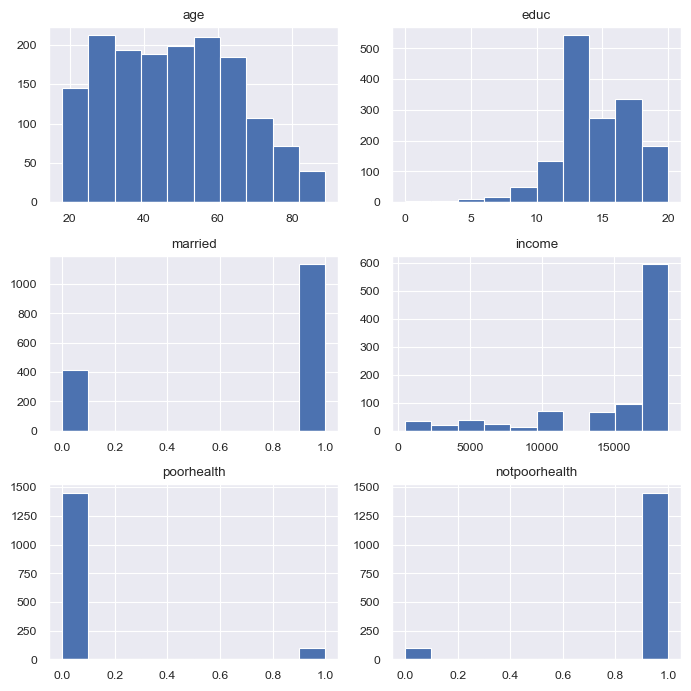

In [58]:
####HERE YOU CAN ADD CODE AND MORE COMMENTS

gssdata.hist(figsize=(7,7))
plt.tight_layout()

## Part 2: Fit a logistic model ignoring missing values

Let's begin by fitting a logistic regression model to predict poor health based on several of the other predictors in the model. In part 3, you will be asked to regularize (with cross-validation) to make sure you do not overfit, but for this part, we will keep things simple.

First, we need to do a small amount of data clean-up (ignoring missingness for now in `income`). Best practice would be to split into train/test first before looking at the data, but again, we can keep it simple in this part.

If you ignore the missingness `sklearn` might crash (`ValueError: Input contains NaN, infinity or a value too large for dtype('float64')`.) So you can also consider not using that variable in the model

In [59]:
#creating dummies two ways
gssdata['female'] = 1*(gssdata['sex'] ==  'female')
dummy_vars = pd.get_dummies(gssdata[['sexornt','partyid','race']])
gssdata = gssdata.join(dummy_vars)

In [60]:
#Let's get a sense of the data we have
print(gssdata.shape)
gssdata.head()

(1551, 22)


,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,...,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,...,0,0,1,0,0,0,1,0,0,1
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,...,0,0,1,0,0,0,1,0,0,1
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN,0,...,0,0,1,0,0,0,1,0,0,1
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN,0,...,0,0,1,0,0,1,0,0,0,1
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN,1,...,0,0,1,0,0,1,0,0,0,1


In [61]:
gssdata.columns

Index(['health', 'age', 'sex', 'educ', 'sexornt', 'partyid', 'race', 'married',
       'income', 'poorhealth', 'notpoorhealth', 'female', 'sexornt_bisexual',
       'sexornt_dont know', 'sexornt_heterosexual or straight',
       'sexornt_homosexual or gay', 'partyid_dem', 'partyid_other',
       'partyid_rep', 'race_black', 'race_other', 'race_white'],
      dtype='object')

### Question 2 <a name="q2"></a>

In the code below try to fit your logistic regression model and provide some short comments on the performance of the model. You don't need to be detailed (yet), but make sure to make 1-2 observations at least.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

predictors = ['age', 'educ', 'income', 'sex', 'married']  
# Separate numeric and categorical columns
numeric_features = ['age', 'educ', 'income', 'married']
categorical_features = ['sex']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Create main pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Prepare the data
X = gssdata[predictors]
y = gssdata['poorhealth']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print performance metrics
print("\nModel Performance:")
print(classification_report(y_test, y_pred,zero_division=0))



Model Performance:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       286
           1       0.00      0.00      0.00        25

    accuracy                           0.92       311
   macro avg       0.46      0.50      0.48       311
weighted avg       0.85      0.92      0.88       311



**Your answer goes here**

Firstly, the significant class imbalance is also visible here. The model does fail in identifying any poor health cases. The high accuracy is misleading due to class imbalance. 

---

## 2a: Handling missingness approach \#1: remove observations. 

We do not know how sklearn will treat the missing values (the `NaN`s), so we should do handle them ourselves.  As a base case, let's remove all observations with missingness.

### Question 3 <a name="q3"></a>

In the code below, remove all observations that are not complete. Report on how many samples were dropped. Do a quick check to see how dropping observations affected the amount of poor health individuals. Do an appropriate plot to show this.

Number of samples dropped: 588
Percentage of samples dropped: 37.91%

Poor Health Distribution:
Before dropping NA - Count: 99, Percentage: 6.38%
After dropping NA - Count: 16, Percentage: 1.66%


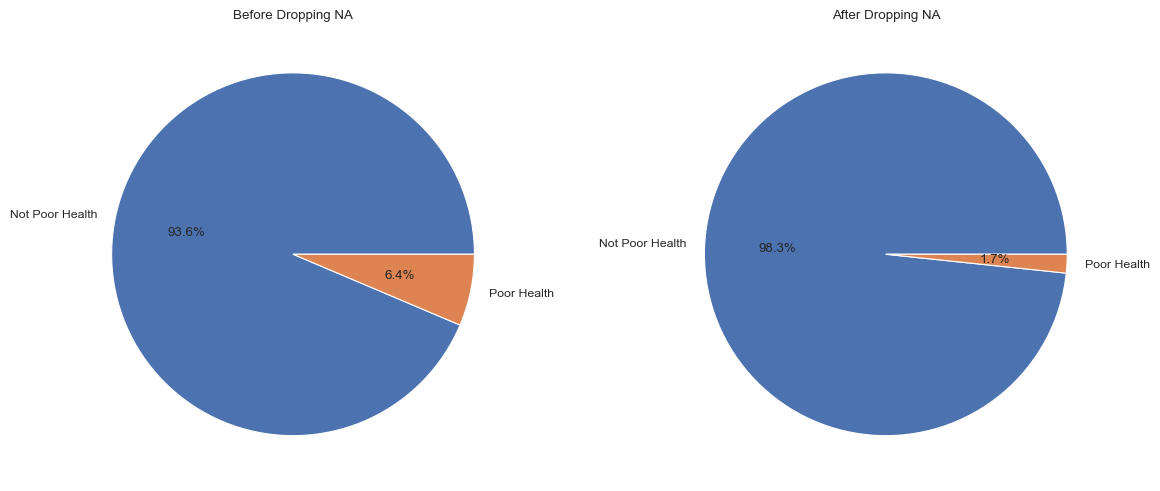

In [63]:
##In the code below: Remove all observations that are not complete
##Report on how many samples were dropped.

#Do a quick check to see how dropping observations affected the amount of poor health individuals
#Do an appropriate plot to show this (e.g. boxplot)

# Check initial number of samples
initial_samples = len(gssdata)
initial_poor_health = gssdata['poorhealth'].sum()
initial_poor_health_pct = (initial_poor_health / initial_samples) * 100

# Remove incomplete observations
gssdata_full = gssdata.dropna()

# Calculate number of dropped samples
dropped_samples = initial_samples - len(gssdata_full)
print(f"Number of samples dropped: {dropped_samples}")
print(f"Percentage of samples dropped: {(dropped_samples/initial_samples)*100:.2f}%")

# Check poor health distribution before and after
final_poor_health = gssdata_full['poorhealth'].sum()
final_poor_health_pct = (final_poor_health / len(gssdata_full)) * 100

print("\nPoor Health Distribution:")
print(f"Before dropping NA - Count: {initial_poor_health}, Percentage: {initial_poor_health_pct:.2f}%")
print(f"After dropping NA - Count: {final_poor_health}, Percentage: {final_poor_health_pct:.2f}%")

# visualization 


# Pie charts comparison
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 5))

# Before dropping NA
labels = ['Not Poor Health', 'Poor Health']
sizes_before = [(initial_samples - initial_poor_health), initial_poor_health]
ax3.pie(sizes_before, labels=labels, autopct='%1.1f%%')
ax3.set_title('Before Dropping NA')

# After dropping NA
sizes_after = [(len(gssdata_full) - final_poor_health), final_poor_health]
ax4.pie(sizes_after, labels=labels, autopct='%1.1f%%')
ax4.set_title('After Dropping NA')

plt.tight_layout()
plt.show()


# gssdata_full #<---this should be your final data frame.

In [64]:
#Now we will split the data before fitting any models, feel free to change this/adapt this to your taste

itrain, itest = train_test_split(range(gssdata_full.shape[0]), test_size=0.25)

#gsstemp = gssdata_full.drop(['health','fairhealth','goodhealth','excellenthealth','sex','sexornt','partyid','race'],axis=1)
gsstemp = gssdata_full[['age', 'educ', 'income','female', 'married']]

X_train = gsstemp.iloc[itrain, :]
X_test = gsstemp.iloc[itest, :]
y_train = gssdata_full['poorhealth'].iloc[itrain]
y_test = gssdata_full['poorhealth'].iloc[itest]

y_train.shape, X_train.shape, y_test.shape, X_test.shape

((722,), (722, 5), (241,), (241, 5))

**Your answer goes here**

The Number of samples dropped is 588. Percentage of samples dropped: 37.91%

Poor Health Distribution:

Before dropping NA - Count: 99, Percentage: 6.38%

After dropping NA - Count: 16, Percentage: 1.66%

### Question 4 <a name="q4"></a>

Fit a logistic regression mode with `C=1000000` (that means that we don't any regularization) and evaluate the classification accuracy on the test set. Discuss whether this accuracy is good/bad.

Then move below to be reminded on the confusion matrix.

In [65]:
from sklearn.metrics import accuracy_score

#####################
# Your code here: fit a logistic model with C=1000000 and evaluate classification accuracy on the test set.
# Then move below to be reminded on the confusion matrix
#####################


# Create and fit the model with high C value (minimal regularization)
logit1 = LogisticRegression(C=1000000, random_state=42)
logit1.fit(X_train, y_train)

# Make predictions
y_pred = logit1.predict(X_test)

# Print accuracy score
print(f"\nAccuracy Score: {logit1.score(X_test, y_test):.3f}")

#logit1
#<-- this should be the name of your model so as to work below with the confusion matrix 
      #(or if you have a different name, then change it there as well)


Accuracy Score: 0.983


**Your answer goes here**

Discuss whether this accuracy is good/bad:

Once again, purely in terms of number, the accuracy of 92% is good, however, this is good only because of the imbalance in the dataset and hence we cannot consider this as a good accuracy. 
With class imbalance being taken into consideration, the accuracy rate falls to about 65.7% which is a better representation for the model that has been developed so far. 


## Reminder: The Confusion Matrix & Some Useful Functions

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP)
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP)
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN)
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN)

A classifier produces a confusion matrix which looks like this:

![confusionmatrix](./confusionmatrix_360.png)


IMPORTANT NOTE: In `sklearn`, to obtain the confusion matrix in the form above, always have the observed `y` first, i.e.: use as `confusion_matrix(y_true, y_pred)`



In [66]:
#the name of your model should be logit1 (to work with the code below)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logit1.predict(X_test)))

[[237   0]
 [  4   0]]


The following function can be used to create confusion tables with different thresholds (same as we did in the notebook explaing AUROC)

In [67]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [68]:
#Try it here!

print(confusion_matrix(y_test,t_repredict(logit1, 0.06, X_test)))
print(confusion_matrix(y_train,t_repredict(logit1, 0.06, X_train)))

[[212  25]
 [  3   1]]
[[673  37]
 [  9   3]]


The following fuction should create ROC curves for your models, based on the model and the ground truth. Feel free to change it and improve it!

In [69]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

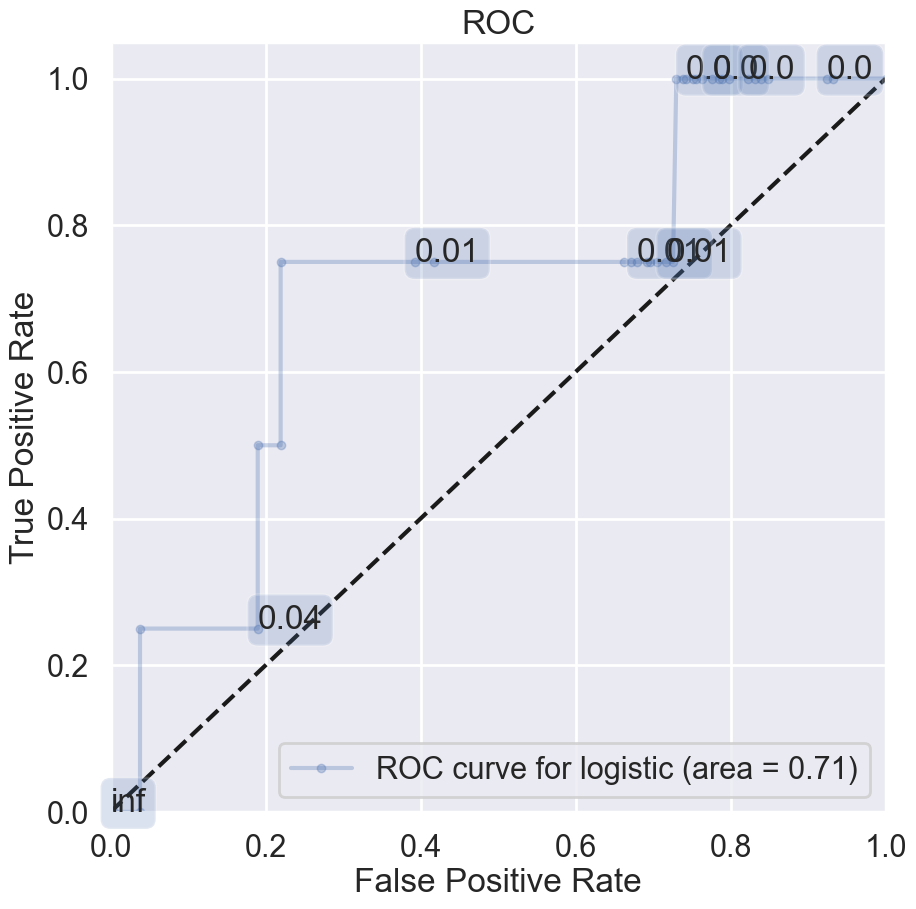

In [70]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",logit1, y_test, X_test, labe=4, skip=0)
plt.show()

### Question 5 <a name="q5"></a>


What does the above ROC curve tell you about the quality of the model we fit on the data?

**Your answer goes here**

The area under the curve is 0.72 and this indicates that model is able to discriminate between the classes(poor and not poor health) well. So, if one were to randomnly select one person with poor health, and one without poor health, then the model will correctly classify them 72% of the time. This is better than random guessing(50%). This could also mean that the predictors that have been used are good indicators of the health characteristic. 

## Let's get back the data with missingness

It's time to build a model to impute the missing data!

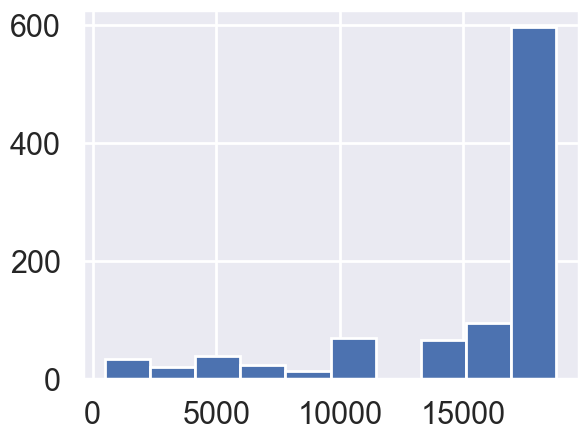

In [71]:
#first build a model to impute using data without missing 
hist = plt.hist(gssdata_full['income'])

---

## 2b: Handling missingness approach \#2: impute the mean 

### Question 6 <a name="q6"></a>

In your first approach, make a copy of the original data frame and impute the missing values by assuming that every missing value shoudl be replaced by the mean. Make sure to do a histogram as well and compare it with the original!

Then fit a model (as before in 2a.) and judge the model accuracy. Use the functions for the ROC curve to establish the result.

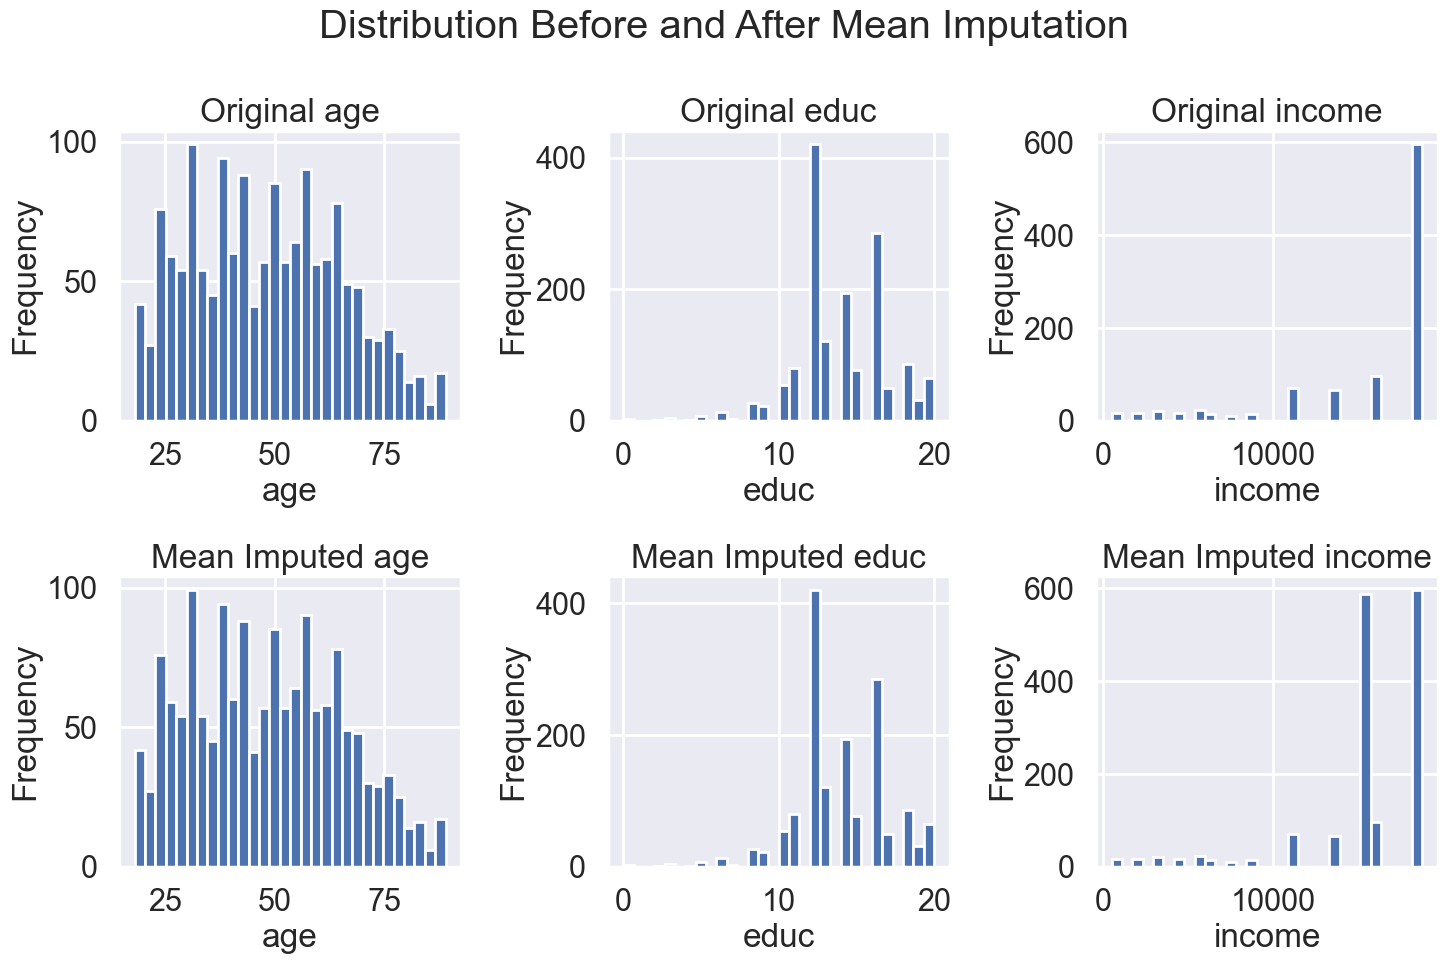

In [72]:
#back to the original data set with missingness, make a copy, and then impute the mean, plot it!
###YOUR CODE HERE
# 1. Create a copy of original dataframe
gssdata_mean_imputed = gssdata.copy()

# 2. Create histograms to compare original data with missing values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Before and After Mean Imputation')

# Plot histograms for numerical columns before imputation
numeric_cols = ['age', 'educ', 'income']
for i, col in enumerate(numeric_cols):
    axes[0, i].hist(gssdata[col], bins=30)
    axes[0, i].set_title(f'Original {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')

# 3. Perform mean imputation
for col in numeric_cols:
    mean_val = gssdata[col].mean()
    gssdata_mean_imputed[col] = gssdata[col].fillna(mean_val)

# Plot histograms after imputation
for i, col in enumerate(numeric_cols):
    axes[1, i].hist(gssdata_mean_imputed[col], bins=30)
    axes[1, i].set_title(f'Mean Imputed {col}')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [73]:
###here, do a proper train/test split and a model training
# Fit logistic regression model on mean-imputed data
X = gssdata_mean_imputed[['age', 'educ', 'income', 'married']]
y = gssdata_mean_imputed['poorhealth']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
logit_mean = LogisticRegression(C=1000000, random_state=42, class_weight='balanced')
logit_mean.fit(X_train, y_train)


LogisticRegression(C=1000000, class_weight='balanced', random_state=42)

In [74]:
#####################
#your code here: create confusion tables for some thresholds to have an idea of how data looks like

# Get predictions and probabilities
y_pred = logit_mean.predict(X_test)
y_pred_proba = logit_mean.predict_proba(X_test)[:, 1]

# Print model performance
print("\nModel Performance with Mean Imputation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Model Performance with Mean Imputation:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       286
           1       0.14      0.60      0.23        25

    accuracy                           0.67       311
   macro avg       0.55      0.64      0.51       311
weighted avg       0.89      0.67      0.75       311

Accuracy: 0.6720257234726688


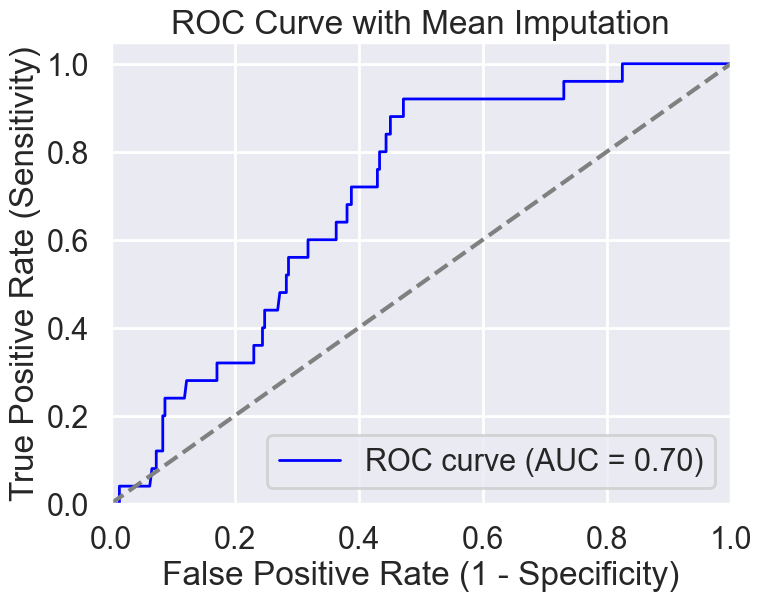

In [75]:
#####################
# your code here: create an ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve with Mean Imputation')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Question 7 <a name="q7"></a>


What does the above ROC curve tell you about the quality of the model we fit on the data?

**your answer goes here**

With this area under the curve of 0.70, this is an acceptable discrimination of the model. This discrimination is not as high the previous ROC curve we had, and this shows that the model is still able to discriminate well between the classes, better than random, but not as much as the previous model. 

---

## 2c: Handling missingness approach \#3: impute with a model (linear regression here)

The third and most sophisticated approach would be to fit a linear model (multiple regression) to estimate income based on the other features (`age`, `educ`, `sex`, `partyid`).

### Question 8 <a name="q8"></a>

Train this model below and then use it in order to compute the missing values. The steps should be as follows:

+ figure out which observations have missing values for income,
+ create the values you will use for imputation by:<br>
a) calculating the predicted values for the observations with missingness using the linear model<br>
b) use these values to impute back into the income variable in the missing entries<br>
+ Do a histogram to see how does that look like

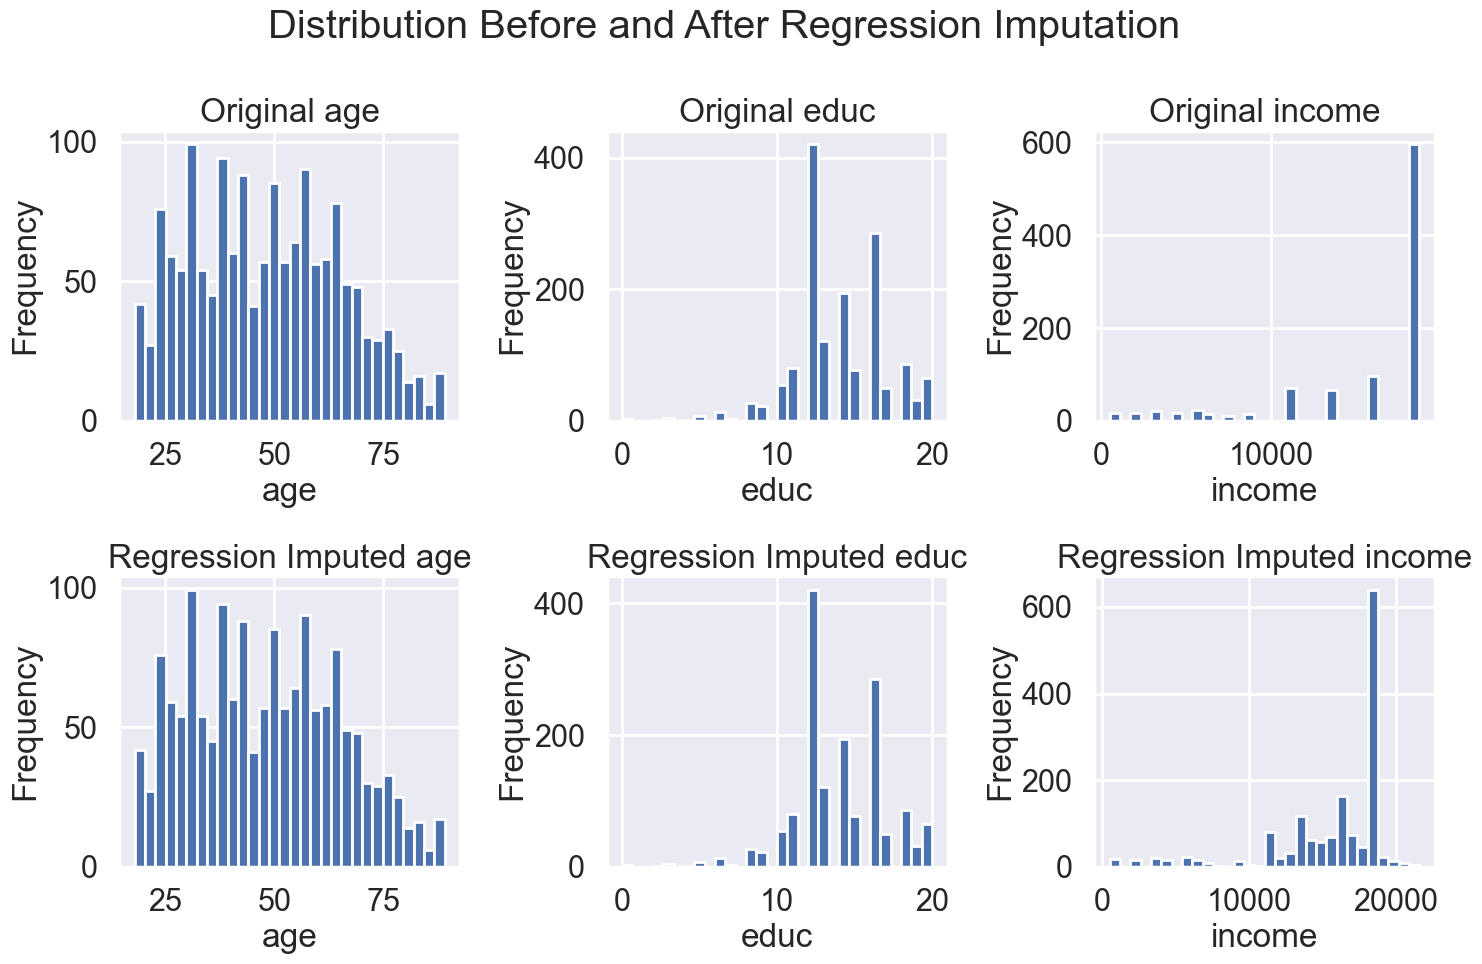

In [76]:
#use the dataset without NAs here
#train a model

#####################
# your code here: 

gssdata_reg_imputed = gssdata.copy()

numeric_cols = ['age', 'educ', 'income']

# Create histograms before imputation
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution Before and After Regression Imputation')

for i, col in enumerate(numeric_cols):
    axes[0, i].hist(gssdata[col].dropna(), bins=30)
    axes[0, i].set_title(f'Original {col}')
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel('Frequency')

categorical_cols = gssdata.select_dtypes(include=['object']).columns.tolist()
gssdata_reg_imputed = pd.get_dummies(gssdata_reg_imputed, columns=categorical_cols, drop_first=True)

missing_mask = gssdata_reg_imputed['income'].isnull()

# Use the specified columns for training the model: age, educ, sex, partyid
features = ['age', 'educ', 'sex_male', 'partyid_dem', 'partyid_rep', 'partyid_other']
known_income = gssdata_reg_imputed[~missing_mask]
missing_income = gssdata_reg_imputed[missing_mask]

regressor = LinearRegression()
regressor.fit(known_income[features], known_income['income'])

predicted_income = regressor.predict(missing_income[features])
gssdata_reg_imputed.loc[missing_mask, 'income'] = predicted_income

for i, col in enumerate(numeric_cols):
    axes[1, i].hist(gssdata_reg_imputed[col], bins=30)
    axes[1, i].set_title(f'Regression Imputed {col}')
    axes[1, i].set_xlabel(col)
    axes[1, i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


#####################

Then fill the missing data with the results you got. You can do that multiple ways, one way to use Python would be the following:

In [77]:
#you might need to change some of the variables below, but in principle it should work
predicted_income = regressor.predict(missing_income[features])  # Using the model to predict missing values
missing_index = gssdata.income[gssdata.income.isnull()].index
missing_series = pd.Series(data = predicted_income, index = missing_index)
#back to the data set with missingness and impute the predictions
gssdata_imp = gssdata.copy()
gssdata_imp['income'] = gssdata_imp['income'].fillna(missing_series)

count     1551.000000
mean     15690.648599
std       4215.241310
min        500.000000
25%      13817.268650
50%      16943.134425
75%      18750.000000
max      21625.865538
Name: income, dtype: float64

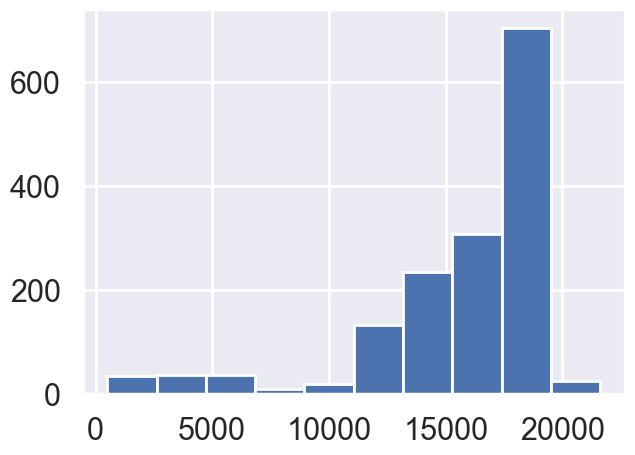

In [78]:
gssdata_imp['income'].hist(figsize=(7,5))
gssdata_imp['income'].describe()

In [79]:
#HERE FIT YOUR MODEL AS USUAL FOR PREDICTING THE HEALTH STATUS (POOR OR NOT)
###here, do a proper train/test split and a model training

#Now we will split the data before fitting any models, feel free to change this/adapt this to your taste

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

features = ['age', 'educ', 'sex_male', 'partyid_dem', 'partyid_rep', 'partyid_other']
target = 'poorhealth'

X = gssdata_reg_imputed[features]
y = gssdata_reg_imputed[target]

# Perform a train/test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
#here you fit a model
#should be called logit3

from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logit3 = LogisticRegression(C=1000000, random_state=42, class_weight='balanced')
logit3.fit(X_train_scaled, y_train)

y_pred = logit3.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6591639871382636
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.66      0.78       286
           1       0.14      0.64      0.23        25

    accuracy                           0.66       311
   macro avg       0.55      0.65      0.51       311
weighted avg       0.89      0.66      0.74       311



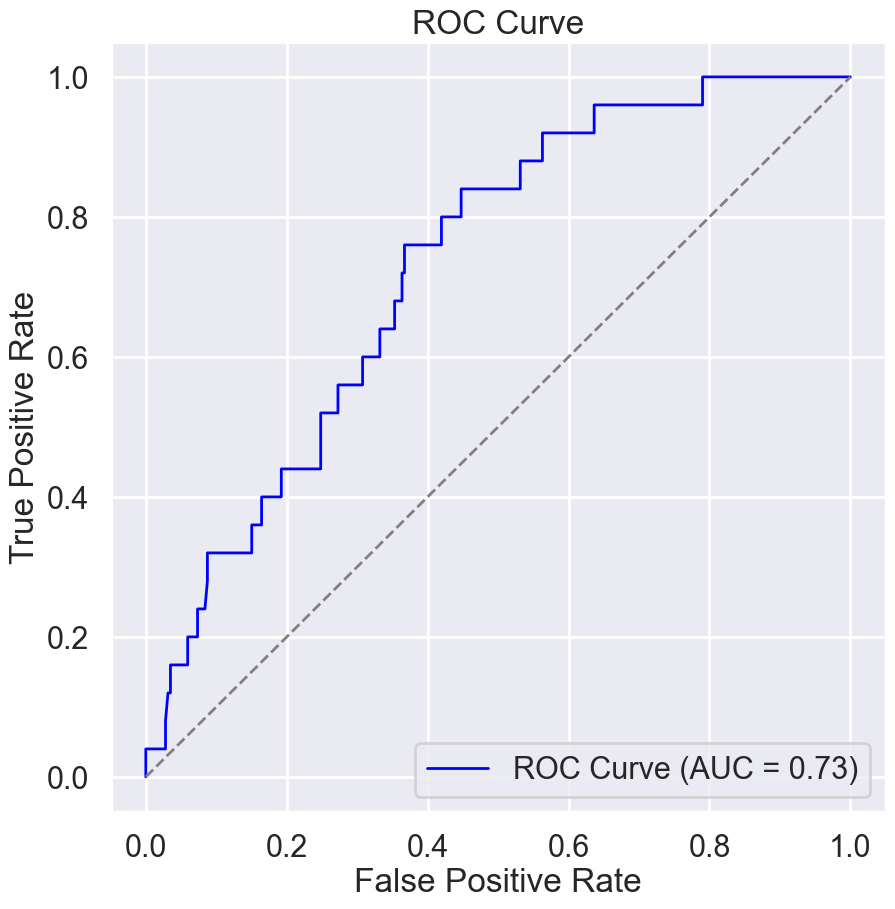

In [84]:
#MAKE CONFUSION TABLES FOR DIFFERENT THRESHOLDS AND DRAW THE AUROC CURVE
#####################
# your code here: create an ROC curve

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import Binarizer

# Step 1: Get predicted probabilities
y_prob = logit3.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class ("Poor")

# Step 2: Create confusion matrices for different thresholds
thresholds = np.linspace(0, 1, 11)  # Thresholds from 0 to 1 (with step of 0.1)
confusion_matrices = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)  # Predicted class based on threshold
    cm = confusion_matrix(y_test, y_pred_thresh)
    confusion_matrices.append(cm)

# Step 3: Plot the ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

sns.set_context("poster")
fig, ax = plt.subplots(figsize=(10, 10))

# Plot ROC curve
ax.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Plot the diagonal (no discrimination)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)

# Adding labels and title
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')

# Show legend
ax.legend(loc='lower right')

# Show plot
plt.show()


#####################


### Question 9 <a name="q9"></a>


Now comment on the performance of difference imputation methods and on the impact it has on the final model performance.


**Your answer goes here**

AUC: Regression imputation leads to a slight improvement in AUC (0.73 vs. 0.70), indicating better overall discriminatory power of the model.
Class Imbalance Handling: Regression imputation marginally improved recall for the "Poor" class (0.64 vs. 0.60), helping the model better identify the minority class.
Precision/Recall Tradeoff: Both methods struggle with low precision for the "Poor" class (0.14), but regression imputation gives a better recall, which is crucial for imbalanced datasets.
Final Conclusion: Regression imputation improves model performance by better preserving feature relationships and improving recall for the minority class, although the precision for "Poor" remains low. Both methods perform similarly in terms of overall accuracy, but regression imputation leads to better class differentiation, particularly for the underrepresented class.

## Part 3: Improving the model.

### Question 10 <a name="q10"></a>


Apply regularization (with cross-validation) to make sure not to overfit to the data and try also different models, like a Decision Tree or a Random Forest. Report on your results for which model handles inbalances in the best way.

For this question, you are also free (but not onbliged) to use techniques to address class imbalances (as we discussed in class) both on the data or model level. Recall that each method has advantages and disadvantages, so you will need to correctly interpret the results and assess the performance of any method you choose on the problem we explore here. Some examples can be found [here](https://imbalanced-learn.org/stable/index.html). 

In [99]:
## your code goes here
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Define models with class_weight and regularization for trees
models = {
    "Logistic Regression": LogisticRegressionCV(Cs=5, cv=3, penalty='l2', solver='liblinear', random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=5, class_weight='balanced', random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)  
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    results[name] = {
        "Accuracy": accuracy,
        "F1-score (Poor Health)": report['1']['f1-score'],
        "Recall (Poor Health)": report['1']['recall'],
        "ROC-AUC": roc_auc
    }

# Print results
for model, metrics in results.items():
    print(f"\n{model} Results:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")




Logistic Regression Results:
Accuracy: 0.6592
F1-score (Poor Health): 0.2319
Recall (Poor Health): 0.6400
ROC-AUC: 0.7285

Decision Tree Results:
Accuracy: 0.7942
F1-score (Poor Health): 0.2000
Recall (Poor Health): 0.3200
ROC-AUC: 0.5791

Random Forest Results:
Accuracy: 0.8553
F1-score (Poor Health): 0.0816
Recall (Poor Health): 0.0800
ROC-AUC: 0.5485


Logistic Regression: Best at detecting poor health cases (recall = 64%), though overall accuracy is lower. Balanced performance (ROC-AUC = 0.73).
Decision Tree: Higher accuracy (79%) but struggles with poor health detection (recall = 32%). Likely overfitting to majority class.
Random Forest: Highest accuracy (85%) but worst at identifying poor health (recall = 8%). Overfitting to majority class, poor generalization.